# Prerequisites (downloading tensorflow/tpu and checkpoints)

In [0]:
from IPython import display
!git clone https://github.com/tensorflow/tpu
display.clear_output()

In [42]:
from __future__ import print_function

checkpoint_name = 'mnasnet-a1' #@param
url = 'https://storage.googleapis.com/mnasnet/checkpoints/' + checkpoint_name + '.tar.gz'
print('Downloading from ', url)
!wget {url}
print('Unpacking')
!tar -xvf {checkpoint_name}.tar.gz

display.clear_output()
print('Successfully downloaded checkpoint from ', url,
      '. It is available as', checkpoint_name)

Successfully downloaded checkpoint from  https://storage.googleapis.com/mnasnet/checkpoints/mnasnet-a1.tar.gz . It is available as mnasnet-a1


In [43]:
!wget https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG -O panda.jpg

--2019-01-24 23:06:07--  https://upload.wikimedia.org/wikipedia/commons/f/fe/Giant_Panda_in_Beijing_Zoo_1.JPG
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116068 (113K) [image/jpeg]
Saving to: ‘panda.jpg’

panda.jpg           100%[===================>] 113.35K   636KB/s    in 0.2s    

2019-01-24 23:06:08 (636 KB/s) - ‘panda.jpg’ saved [116068/116068]



In [0]:
# setup path
import sys
sys.path.append('/content/tpu/models/official/mnasnet')
sys.path.append('/content/tpu/models/common')



```
# This is formatted as code
```

# Inference with SavedModel

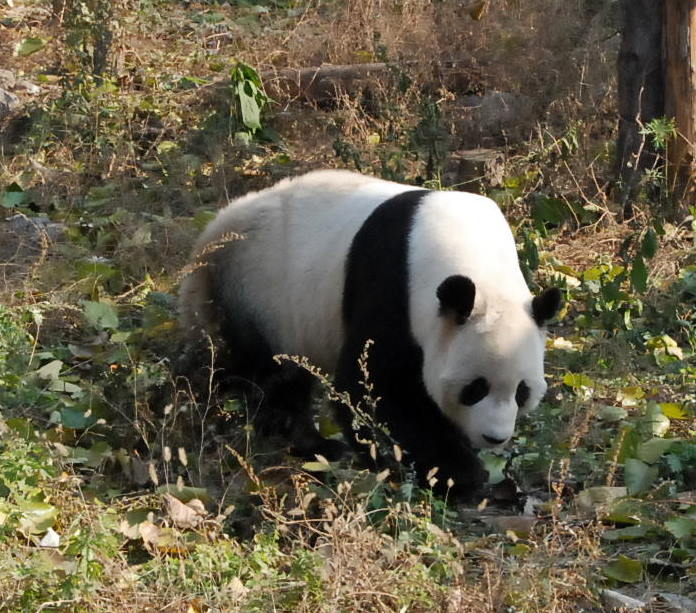

In [45]:
from IPython import display
import pylab
import PIL
import numpy as np
filename = 'panda.jpg'
display.display(display.Image(filename))
img = np.array(PIL.Image.open(filename).resize((224, 224))).astype(np.float)

In [46]:
import os
import tensorflow as tf

checkpoint_name = 'mnasnet-a1'
export_dir = os.path.join(checkpoint_name, 'saved_model')
serv_sess = tf.Session(graph=tf.Graph())
meta_graph_def = tf.saved_model.loader.load(serv_sess, [tf.saved_model.tag_constants.SERVING], export_dir)


INFO:tensorflow:Restoring parameters from mnasnet-a1/saved_model/variables/variables


In [0]:
# Checks the saved model signatures.
signature = 'serving_default'
print('Serving Signature: ', signature)
print(meta_graph_def.signature_def[signature])

In [47]:
import imagenet

top_class, probs = serv_sess.run(fetches=["ArgMax:0", "softmax_tensor:0"], feed_dict={"Placeholder:0": [img]})
print("Top class: ", top_class[0], " with Probability= ", probs[0][top_class[0]])
label_map = imagenet.create_readable_names_for_imagenet_labels()  
for idx, label_id in enumerate(reversed(list(np.argsort(probs)[0][-5:]))):
  print("Top %d Prediction: %d, %s, probs=%f" % (idx+1, label_id, label_map[label_id], probs[0][label_id]))
  

Top class:  388  with Probability=  0.87763524
Top 1 Prediction: 388, lesser panda, red panda, panda, bear cat, cat bear, Ailurus fulgens, probs=0.877635
Top 2 Prediction: 245, Tibetan mastiff, probs=0.002865
Top 3 Prediction: 384, Madagascar cat, ring-tailed lemur, Lemur catta, probs=0.002584
Top 4 Prediction: 296, American black bear, black bear, Ursus americanus, Euarctos americanus, probs=0.001733
Top 5 Prediction: 222, Irish water spaniel, probs=0.001599
